In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import cv2
from sklearn import neighbors

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('..\\Spyder'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from Spyder import tsne

In [4]:
from sklearn.decomposition import PCA

In [53]:
from sklearn.neighbors import NearestNeighbors
def get_nn_class(X, y):
    neigh = NearestNeighbors(n_neighbors=2, algorithm='brute')
    neigh.fit(X)
    ids = neigh.kneighbors(X, return_distance=False)
    ids = ids[:,1]
    y_nn_class = y.reset_index().label[ids]
    return y_nn_class.values

## Load MNIST data set

In [6]:
X = pd.read_csv(r"./dataset/MNIST/mnist_train.csv", header=None)
y = pd.read_csv(r"./dataset/MNIST/train_labels.csv", names=['label'])

In [7]:
y = y - 1

In [8]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [9]:
y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [10]:
y.shape

(60000, 1)

In [11]:
X.shape

(60000, 784)

print value counts of unique labels:

In [12]:
y['label'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

show random sample of 64 images:

In [13]:
random_sample_idxs = y.sample(64).index

In [14]:
X_sample = X.iloc[random_sample_idxs,:]
y_sample = y.iloc[random_sample_idxs,:]

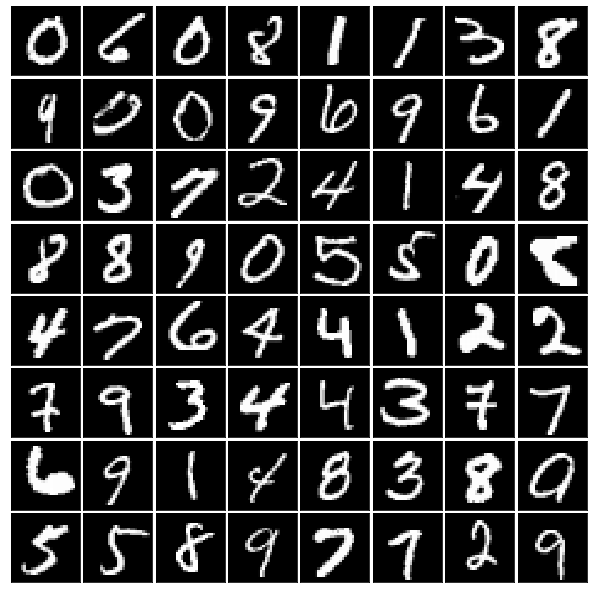

In [15]:
# initial visualization
fig = plt.figure(figsize= (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(random_sample_idxs)):
    plt.subplot(8,8,i+1)
    plt.imshow(X_sample.iloc[i,:].values.reshape(28,-1), cmap = plt.cm.gray, interpolation='nearest')
    #plt.text(x= 0.08, y = 3.5, s = y_sample.iloc[i, 0])
    plt.xticks([]),  plt.yticks([])

## Run TSNE on 6000 random samples

In [17]:
random_sample_idxs = y.sample(6000).index

In [18]:
X_sample = X.iloc[random_sample_idxs,:]
y_sample = y.iloc[random_sample_idxs,:]

In [19]:
X_sample.shape

(6000, 784)

Reduce input data to 30 dimension by using PCA

In [20]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_sample.values)

Run scikit-learn exact method

In [21]:
tsne_sl = TSNE(n_components = 2, perplexity = 40, method = "exact", early_exaggeration=4.0, random_state = 1, verbose = 1)

In [22]:
X_tsne_sl = tsne_sl.fit_transform(X_pca)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 1.747263
[t-SNE] KL divergence after 250 iterations with early exaggeration: 17.545457
[t-SNE] KL divergence after 1000 iterations: 1.360135


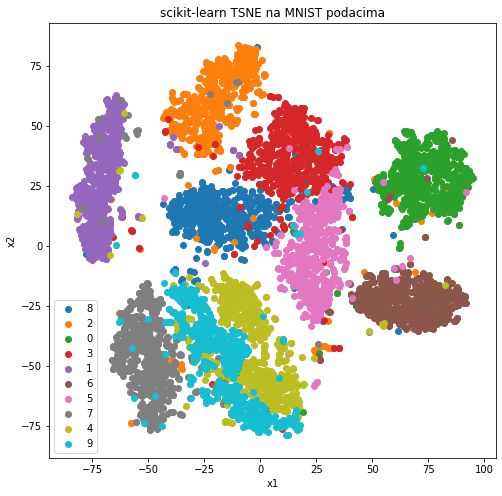

In [23]:
numbers = y_sample.label.unique()
plt.figure(figsize = (8,8))
for number in numbers:
    plt.scatter(X_tsne_sl[y_sample.label == number,0], X_tsne_sl[y_sample.label == number,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('scikit-learn TSNE na MNIST podacima')
plt.legend(numbers)
plt.show()

Run implemented exact method

In [24]:
X_tsne = tsne.TSNE(X_pca, n_components = 2, perplexity = 40, n_iter = 1000, early_exaggeration = 4.0, method = "exact", random_state = 1, verbose = 1)

[t-SNE] Mean sigma: 1.747261018777006
[t-SNE] KL divergence after 250 iterations: 17.545490827015055
[t-SNE] KL divergence after 1000 iterations: 1.3601162276968504


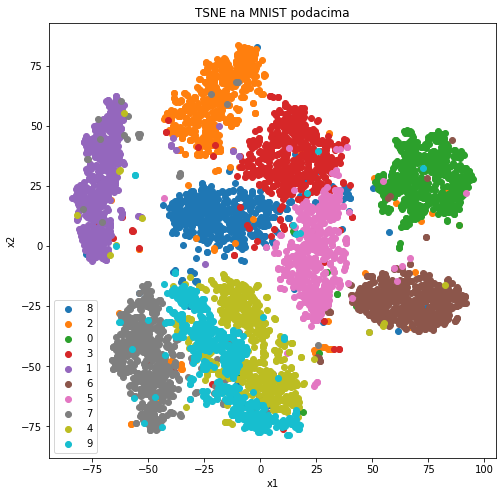

In [25]:
plt.figure(figsize = (8,8))
for number in numbers:
    plt.scatter(X_tsne[y_sample.label == number,0], X_tsne[y_sample.label == number,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('TSNE na MNIST podacima')
plt.legend(numbers)
plt.show()

Nearest Neighbors error

In [28]:
y_true_6000 = get_nn_class(X_sample, y_sample)
y_pred_tsne_sl_6000 = get_nn_class(X_tsne_sl, y_sample)
y_pred_tsne_6000 = get_nn_class(X_tsne_sl, y_sample)
print('Err true - tsne_sl',(y_true_6000!=y_pred_tsne_sl_6000).sum()/len(y_true_6000))
print('Err true - tsne',(y_true_6000!=y_pred_tsne_6000).sum()/len(y_pred_tsne_6000))

Err true - tsne_sl 0.050833333333333335
Err true - tsne 0.050833333333333335


## Barnes-Hut-SNE on 1000 random samples

In [29]:
random_sample_idxs = y.sample(1000).index

In [30]:
X_sample = X.iloc[random_sample_idxs,:]
y_sample = y.iloc[random_sample_idxs,:]

In [31]:
X_sample.shape

(1000, 784)

Reduce input data to 30 dimension by using PCA

In [32]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_sample.values)

Run scikit-learn barnes-hut method

In [33]:
tsne_sl_bh = TSNE(n_components = 2, perplexity = 40, method = "barnes_hut", early_exaggeration=12.0, random_state = 1, verbose = 1)

In [34]:
X_tsne_bh_sl = tsne_sl_bh.fit_transform(X_pca)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.005s...
[t-SNE] Computed neighbors for 1000 samples in 0.069s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.554637
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.159660
[t-SNE] KL divergence after 1000 iterations: 0.957803


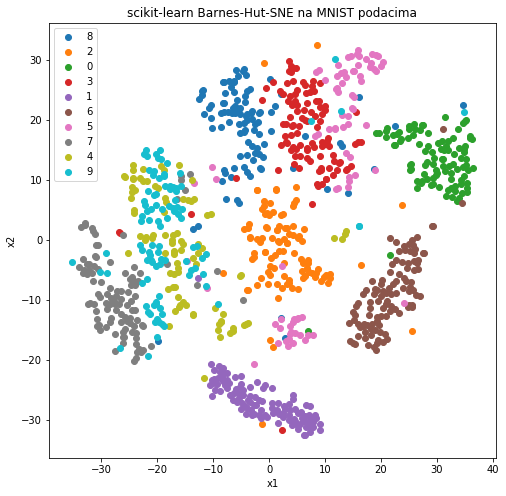

In [35]:
plt.figure(figsize = (8,8))
for number in numbers:
    plt.scatter(X_tsne_bh_sl[y_sample.label == number,0], X_tsne_bh_sl[y_sample.label == number,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('scikit-learn Barnes-Hut-SNE na MNIST podacima')
plt.legend(numbers)
plt.show()

Run implemented barnes-hut method

In [36]:
X_tsne_bh = tsne.TSNE(X_pca, n_components = 2, perplexity = 40, n_iter = 1000, early_exaggeration = 12.0, method = "barnes_hut", random_state = 1, verbose = 1)

[t-SNE] Mean sigma: 2.554637681495003
[t-SNE] KL divergence after 250 iterations: 67.01348285004497
[t-SNE] KL divergence after 1000 iterations: 0.9996938170352223


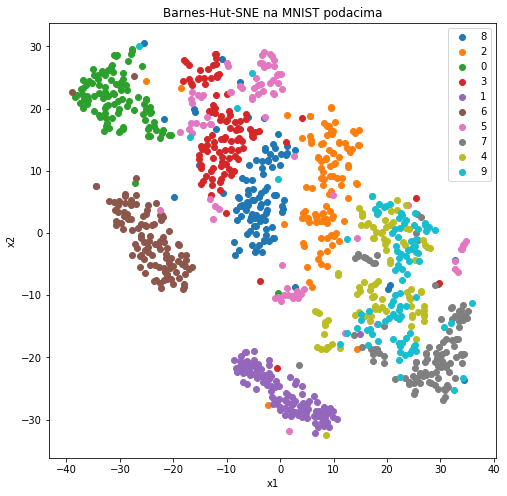

In [37]:
plt.figure(figsize = (8,8))
for number in numbers:
    plt.scatter(X_tsne_bh[y_sample.label == number,0], X_tsne_bh[y_sample.label == number,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Barnes-Hut-SNE na MNIST podacima')
plt.legend(numbers)
plt.show()

Run implemented exact method

In [56]:
X_tsne_exact = tsne.TSNE(X_pca, n_components = 2, perplexity = 40, n_iter = 1000, early_exaggeration = 4.0, method = "exact", random_state = 1, verbose = 1)

[t-SNE] Mean sigma: 2.43232207127623
[t-SNE] KL divergence after 183 iterations: nan
[t-SNE] KL divergence after 1000 iterations: 0.8303464551915656


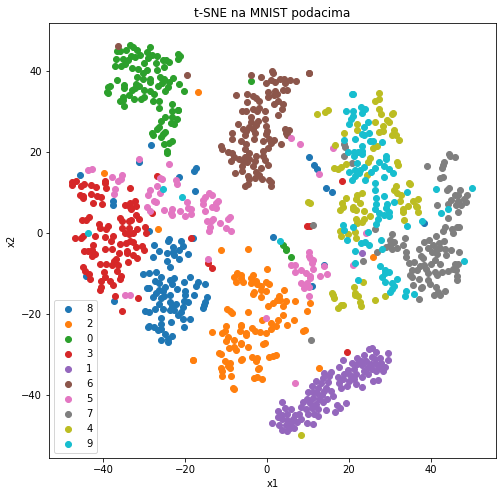

In [57]:
plt.figure(figsize = (8,8))
for number in numbers:
    plt.scatter(X_tsne_exact[y_sample.label == number,0], X_tsne_exact[y_sample.label == number,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('t-SNE na MNIST podacima')
plt.legend(numbers)
plt.show()

Nearest Neighbors error

In [58]:
y_true_1000 = get_nn_class(X_sample, y_sample)
y_pred_tsne_1000 = get_nn_class(X_tsne_exact, y_sample)
y_pred_tsne_sl_bh__1000 = get_nn_class(X_tsne_bh_sl, y_sample)
y_pred_tsne_bh_1000 = get_nn_class(X_tsne_bh, y_sample)
print('Err true - tsne_sl_bh',(y_true_1000!=y_pred_tsne_sl_bh__1000).sum()/len(y_true_1000))
print('Err true - tsne_bh',(y_true_1000!=y_pred_tsne_bh_1000).sum()/len(y_true_1000))
print('Err true - tsne',(y_true_1000!=y_pred_tsne_1000).sum()/len(y_true_1000))

Err true - tsne_sl_bh 0.104
Err true - tsne_bh 0.101
Err true - tsne 0.092


## Barnes-Hut-SNE on 60000 samples

In [232]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

In [235]:
tsne_sl_bh_60000 = TSNE(n_components = 2, perplexity = 40, method = "barnes_hut", early_exaggeration=12.0, random_state = 1, verbose = 1)

In [236]:
X_tsne_sl_60000 = tsne_sl_bh_60000.fit_transform(X_pca)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.438s...
[t-SNE] Computed neighbors for 60000 samples in 157.569s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for 

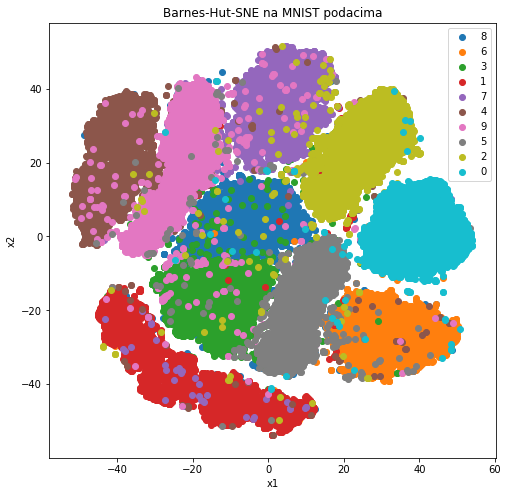

In [237]:
plt.figure(figsize = (8,8))
for number in numbers:
    plt.scatter(X_tsne_sl_60000[y.label == number,0], X_tsne_sl_60000[y.label == number,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Barnes-Hut-SNE na MNIST podacima')
plt.legend(numbers)
plt.show()